
**Mathematical Methods In Engineering - Computer assignment**






In [1]:
import numpy as np 
import copy
from numpy.linalg import matrix_power as power
from numpy.linalg import inv as inv
from numpy import diag as diag
from numpy.linalg import norm as norm
from numpy import transpose as transpose
from numpy import linalg as LA

**In this exercise, we will examine a method of calculating eigenvalues and eigenvectors of a matrix numerically.**
**First, in the following section, we make a 3x3 diagonal matrix.**


In [2]:
## Do not change anything in this section!

W = np.random.randn(3,3)
Q,R = np.linalg.qr(W)

D = np.random.uniform(low = 1, high = 10, size = 3)
D = D * np.random.choice([-1,1],3)

A = Q @ np.diag(D) @ Q.T

print("A = ",A)

A =  [[ 6.83979773e+00  3.39539543e-02  3.60836453e-01]
 [ 3.39539543e-02  6.45312982e+00 -1.24435897e-03]
 [ 3.60836453e-01 -1.24435897e-03  7.47944377e+00]]


**Diagonalize the matrix A using `np.linalg.eig`. At this stage, it is sufficient to return a diagonal matrix of eigenvalues called D and a matrix V containing eigenvectors. Also, reconstruct matrix A using the obtained values and compare with the previous part.**

In [3]:
# Complete this part!

## your code here

w, v = LA.eig(A)

D = diag(w)
V = v
B = inv(V)@D@V

print("Eigenvalues = ", (D @ np.array([[1],[1],[1]])).T,"\n") 
print("Eigenvectors = \n", V,"\n")
print("B = ", B)



Eigenvalues =  [[7.64193049 6.68177834 6.44866249]] 

Eigenvectors = 
 [[ 0.41060354  0.90269388  0.12864094]
 [ 0.0107731   0.13626982 -0.99061318]
 [ 0.91175034 -0.40813514 -0.04622806]] 

B =  [[6.64986888 0.44262617 0.06054111]
 [0.44262617 7.42533321 0.10709785]
 [0.06054111 0.10709785 6.69716924]]


**Note that matrix A when multiplied by any other non-zero vector results in a non-zero vector. (Why?) Create an arbitrary non-zero vector called x and multiply the matrix A by it. Also normalize the response. Repeat the same for higher powers of A such as 2, 10, 15 and 50. In this part, you can use the `matrix_power` function.**

In [4]:
# Complete this part!

x = np.random.rand(3)# your code here

x1 = power(A, 1)@x/norm(power(A, 1)@x) # your code here
x2 = power(A, 2)@x/norm(power(A, 2)@x) # your code here
x10 = power(A, 10)@x/norm(power(A, 10)@x) # your code here
x15 = power(A, 15)@x/norm(power(A, 15)@x) # your code here
x50 = power(A, 50)@x/norm(power(A, 50)@x) # your code here

print("x1 = ",x1,"\n")
print("x2 = ",x2,"\n")
print("x10 = ",x10,"\n")
print("x15 = ",x15,"\n")
print("x50 = ",x50,"\n")

x1 =  [0.76244505 0.63452497 0.1267107 ] 

x2 =  [0.77568344 0.60507097 0.17945562] 

x10 =  [0.71782874 0.29892873 0.62877938] 

x15 =  [0.60183929 0.15279583 0.78386409] 

x50 =  [0.41264601 0.01138491 0.91082032] 



**What pattern do you see as the power of A increases? Pay attention to the matrix containing  eigenvectors and compare it with the resulting vectors from this section. The vector resulting from this process corresponds to which eigenvalue? To be sure of the correct extraction, you can rerun the first part and repeat the process with the new matrix.Using this result above, find the largest eigenvalue of A and its corresponding eigenvector. According to the presented method, this value is approximate**


In [6]:
# Complete this part!
## you code here
#generate random vector 
x=np.random.rand(3)
#---------------------
v = power(A, 100)@x/norm(power(A, 100)@x) # your code here eigenvector
Lambda = norm(A@v)/norm(v)*np.sign((A@v)[0]/v[0]) # your code here corresponding Eigenvalue
#---------------------
print("Lambda = ", Lambda)
print("Eigenvector: \n ", v)


Lambda =  7.641930488906758
Eigenvector: 
  [0.41060323 0.01077308 0.91175048]


**So far, we were able to obtain the largest eigenvalue (in terms of absolute value) and its corresponding eigenvector. Now we want to use this method to calculate other eigenvalues and eigenvectors of the matrix. For this purpose, note that the diagonalization of the matrix is equivalent to the sum of n or less of the matrix with rank 1. The following relationship shows this:**


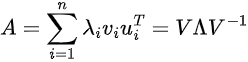

**In the above relation, 𝒰ᵢᵀ is the i-th row of the inverse of matrix V. As a result, using the above relation, we can find a matrix whose largest eigenvalue is the second largest eigenvalue of matrix A. In fact, it is sufficient that A minus one becomes a rank one matrix. As a result, by continuing this process, the eigenvalues and eigenvectors of A can be obtained**


In [31]:
# Complete this part!
def eigen(A):
  # input: square matrix A
  # output: diagonal matrix D & eigenvector matrix V
  # NOTE: the equation "A = V @ D @ np.linalg.inv(V)" must hold 
  dim=A.shape[0]
  eigenvalues_list=[]
  eigen_vector=np.zeros_like(A)
  B=np.copy(A)
  for i in range(A.shape[0]):
    # your code here
    x=np.random.rand(3)
    #---------------------
    v = power(B, 100)@x/norm(power(B, 100)@x) # your code here eigenvector
    Lambda = norm(B@v)/norm(v)*np.sign((B@v)[0]/v[0]) # your code here corresponding 
    #----------------------
    eigen_vector[:,i]=v
    eigenvalues_list.append(Lambda)
    #-----------------------  
    #--------------------
    B=B-Lambda*np.outer(v,transpose(v))
   
  D=np.diag(np.array(eigenvalues_list)) 
  V=eigen_vector
  return D, V

In [32]:
d,v=eigen(A)
print("eigenvalues in diagonal matrix form \n")
print(f"{d}\n")
#----------------------
print("eigenvectors \n")
print(v)


eigenvalues in diagonal matrix form 

[[7.64193049 0.         0.        ]
 [0.         6.68176553 0.        ]
 [0.         0.         6.44867601]]

eigenvectors 

[[ 0.41060313  0.9017065  -0.13563401]
 [ 0.01077305  0.14367655  0.98952717]
 [ 0.91175052 -0.40777742  0.04939018]]




## proof of above algorithm 

suppose any arbitrary vector $x$ 

we know that eigenvector of unique eigenvalues are orthonormal (they are linearly independet) . so we can write x in the following form : 

$x=c_{1}v_{1}+c_{2}v_{2}+⋯+c_{n}v_{n}$


Multiplying both sides by $A^{k}$ gives :

* we know that $A^{K}$ has same eigenvector as $A$ . also correspond to each $λ_{i}$ for $A$, $A^{K}$ has eigenvalue equals to $λ_{i}^{k}$ . so we have :  

$A^{K}x=A^{k}(c_{1}v_{1}+c_{2}v_{2}+⋯+c_{n}v_{n})=c_{1}λ_{1}^{k}v_{1}+c_{2}λ_{2}^{k}v_{2}+⋯+c_{n}λ_{n}^{k}v_{n}$


* factorization from largest eigenvalue ( assume that λ_{1} is largest) : 
  
  $A^{K}x=λ_{1}^{k}(c_{1}v_{1}+c_{2}(\frac{λ_{2}}{λ_{1}})^{k}v_{2}+⋯+c_{n}(\frac{λ_{n}}{λ_{1}})^{k}v_{n})$

* Since the $λ_{1}$ is largest eigenvalue, for each $i$, $(\frac{λ_{2}}{λ_{1}})^{k}\rightarrow\infty$ as $k→∞. $ so we have :

$A^{k}x=c_{1}λ_{1}^{k}v_{1}$

we know that $v_{1}$ is unitary vector. so if we normilize above equation, we reach $v_{1}$